In [6]:
using Random, Distributions, Plots

In [48]:
function abc(observations,prior,likelihood,tolerance,M)
    # Initializing the sample vector
    samples = Vector{Union{Missing,Float64}}(missing,M)

    # Generate M+burn_in samples
    for i = 1:M
        # Initialize bad distance
        d = tolerance + 1

        # random observation
        #y_obs = sample(observations)

        while d > tolerance
            # Sample from the prior
            global t = rand(prior)
            # Use this parameter to sample from the likelihood
            y = rand(likelihood(t), size(observations)[1])
            # Measure how far this sample fell from the target observation
            d = abs(sum(y)-sum(observations))/size(observations)[1]
        end

        # We have chosen a parameter 
        samples[i] = t
    end

    # Return samples
    return samples
end

abc (generic function with 1 method)

In [49]:
observations = rand(Exponential(100),1000)
prior = Uniform(0,200)
likelihood = t -> Exponential(t)

#27 (generic function with 1 method)

In [50]:
post = abc(observations, prior, likelihood, 0.005, 1000)

1000-element Array{Union{Missing, Float64},1}:
 106.36897931547162
 113.38884287301224
 103.53869935217924
 103.18160948748529
 105.6309596762143 
 101.04501573466926
 105.55616317826914
 102.87082731604724
 107.1025449199483 
 104.91222479846058
 104.35116436547438
 102.78366780350882
 104.7138725428463 
   ⋮               
 107.05748024439016
 104.8318673394744 
 104.0217123531177 
 106.17512077038027
 100.95479529634983
 101.24473753167491
 104.69316363723328
 107.26140817512753
 105.02803420766553
 102.79999783645293
 107.93914151779637
 109.2071957225421 

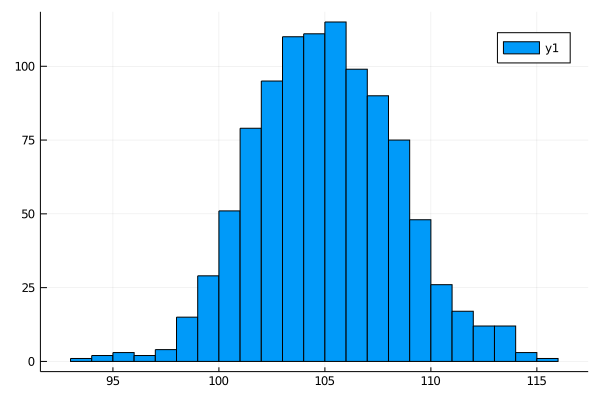

In [51]:
histogram(post)